# Economic-research - Inflation vs I-Rates Turkey

## 1 Load Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

In [2]:
path= "https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/turkey.xlsx"

data = pd.read_excel(path)
data = data.round(2)
data

,Date,Inflation,I_Rates
0,2011-12-01,10.45,13.97
1,2012-01-01,10.61,15.00
2,2012-02-01,10.43,16.00
3,2012-03-01,10.43,13.75
4,2012-04-01,11.14,16.00
...,...,...,...
137,2023-05-01,39.59,46.00
138,2023-06-01,38.21,55.00
139,2023-07-01,47.83,50.00
140,2023-08-01,58.94,40.00


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       142 non-null    datetime64[ns]
 1   Inflation  142 non-null    float64       
 2   I_Rates    142 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 3.5 KB


In [4]:
data.describe()

,Inflation,I_Rates
count,142.000000,142.000000
mean,19.085915,19.589155
std,19.655035,8.051468
min,6.130000,11.000000
25%,8.285000,15.000000
50%,10.875000,15.530000
75%,18.507500,23.000000
max,85.510000,55.000000


Count: Indicates the total number of observations or data points. Both Inflation and Interest Rates have 142 observations.

Mean: The average value. For Inflation, the mean is 19.09, and for Interest Rates, it’s 19.59. This suggests that, on average, both the inflation rate and interest rates are around 19%.

Standard Deviation (std): Measures the amount of variation or dispersion in the data. A higher standard deviation indicates more spread out data. Inflation has a standard deviation of 19.66, indicating a wide variation, while Interest Rates have a standard deviation of 8.05, indicating less variation compared to Inflation.

Min: The minimum value in the dataset. The lowest recorded Inflation rate is 6.13, and the lowest Interest Rate is 11.00.

25% (First Quartile): This is the median of the first half of the data. For Inflation, 25% of the
values are below 8.29, and for Interest Rates, 25% are below 15.00. This is a measure of the lower
end of the data distribution.

50% (Median): This is the middle value when the data is ordered from lowest to highest. The
median Inflation rate is 10.88, and the median Interest Rate is 15.53. The median is often considered
a better measure of central tendency when data is skewed.

75% (Third Quartile): This is the median of the second half of the data. For Inflation, 75% of the
values are below 18.51, and for Interest Rates, 75% are below 23.00. This provides insight into the
upper end of the data distribution.

Max: The maximum value in the dataset. The highest Inflation rate recorded is 85.51, and the
highest Interest Rate is 55.00.

This summary gives a comprehensive overview of the distribution of Inflation and Interest Rates.
The wide range in the Inflation data, indicated by its high standard deviation and the difference
between its minimum and maximum values, suggests significant variability over time or across
different measurements.
Interest Rates, while also varying, show less extreme fluctuation than
Inflation.

## 2 Plotting box plots to visualize outliers

In [22]:
df = pd.read_excel(path,
                    index_col='Date',
                    parse_dates=True
                    )
df = df.round(2)
# df.plot(figsize=(12,10))

In [6]:
import plotly.graph_objects as go
fig = go.Figure()

#Var1
fig.add_trace(go.Scatter(x = df.index,
                         y = df['Inflation'],
                         mode = "lines",
                         name = "Actual",
                         line_color='#0000FF',
                         ))
##############################################################
#Var2
fig.add_trace(go.Scatter(x = df.index,
                         y = df['I_Rates'],
                         mode = "lines",
                         name = "Predicted",
                         line_color='#ff8c00',
                         ))

##############################################################
# adjust layout
fig.update_layout(title = "Inflaction & Interest Rate Turkey since 2011",
                  xaxis_title = "Date",
                  yaxis_title = "Inflaction & Interest Rate % ",
                  width = 1700,
                  height = 700,
                  )
####################################################################
# zoomming
fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(count=2, label="3y", step="year", stepmode="backward"),
            dict(count=10, label="10y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)

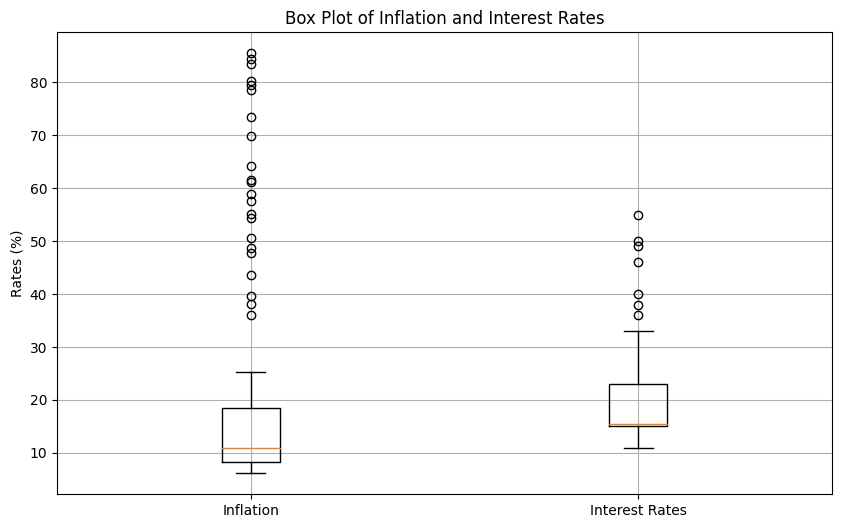

In [7]:
plt.figure(figsize=(10, 6))
plt.boxplot([data['Inflation'], data['I_Rates']], labels=['Inflation','Interest Rates'])
plt.title('Box Plot of Inflation and Interest Rates')
plt.ylabel('Rates (%)')
plt.grid(True)
plt.show()

Compare Medians: See how the median of Inflation compares to the median of Interest Rates. This
tells you which one tends to be higher on average.

Examine the Spread (IQR): Look at the length of the boxes. A longer box means more variability
in the middle half of the data. A shorter box means the data is more consistently centered around
the median.

Look for Skewness: If the median line is closer to the bottom or top of the box, it indicates skewness.
For instance, if the median is closer to the bottom of the box, the data is right-skewed (positively
skewed).

Identify Outliers: Any data points that lie beyond the whiskers are outliers. These could indicate
exceptional circumstances or errors in the data.
Compare Ranges: The ends of the whiskers show the overall range of the data, excluding outliers.
Compare these for Inflation and Interest Rates

## 3 Plotting scatter plots to find outliers

Text(0.5, 1.0, 'Inflation vs I_Rates')

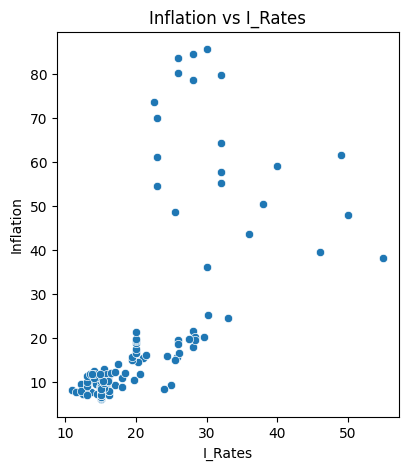

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x=data['I_Rates'], y=data['Inflation'])
plt.title('Inflation vs I_Rates')

Observations and Analysis:

Each point on the plot represents a pair of values for Inflation and Interest Rates (I_Rates) for a
particular time period. The distribution of points can give us insights into how these two variables
might be related.

For instance, if there’s a clear pattern or trend (like a linear or non-linear
relationship), it could suggest a correlation between inflation and interest rates. It’s important to
note that correlation does not imply causation. Even if there’s a pattern, it doesn’t necessarily
mean that one variable is causing changes in the other.

## 4 Calculating the correlation

In [9]:
correlation_matrix = data.corr()
correlation_matrix

<ipython-input-9-6617581d08be>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,Inflation,I_Rates
Inflation,1.000000,0.677465
I_Rates,0.677465,1.000000


A correlation of 0.677465 indicates a moderate to strong positive relationship between ‘Inflation’
and ‘I_Rates’. This means that, generally, as inflation increases, interest rates also increase, and
vice versa. However, it’s important to remember that correlation does not imply causation. This
correlation coefficient only measures the strength and direction of a linear relationship between
these two variables

In [10]:
from scipy.stats import shapiro, normaltest
# Perform Shapiro-Wilk test for normality on both 'Inflation' and 'Interest␣Rates'
shapiro_test_inflation = shapiro(data['Inflation'])
shapiro_test_interest_rates = shapiro(data['I_Rates'])
shapiro_test_inflation, shapiro_test_interest_rates

(ShapiroResult(statistic=0.625014066696167, pvalue=1.738449759200236e-17),
 ShapiroResult(statistic=0.7641910314559937, pvalue=7.871443297516323e-14))

For both columns, the p-values are significantly less than the common alpha level of 0.05. This
indicates strong evidence against the null hypothesis, suggesting that the data in both the ‘Inflation’
and ‘Interest Rates’ columns do not follow a normal distribution. The test statistics further reinforce
this. In a Shapiro-Wilk test, a test statistic closer to 1 indicates data more closely resembling a
normal distribution. The values 0.625 for Inflation and 0.764 for Interest Rates are considerably
far from 1, implying a deviation from normality.

## 5 Applying the Kolmogorov-Smirnov Test For Normality

In [11]:
from scipy.stats import kstest
ks_test_inflation = kstest(data['Inflation'], 'norm', args=(data['Inflation'].mean(), data['Inflation'].std()))
ks_test_interest_rates = kstest(data['I_Rates'], 'norm', args=(data['I_Rates'].mean(), data['I_Rates'].std()))
ks_test_inflation, ks_test_interest_rates

(KstestResult(statistic=0.29126170279580954, pvalue=3.644703137871475e-11, statistic_location=20.35, statistic_sign=1),
 KstestResult(statistic=0.2414704624921582, pvalue=8.987520444429373e-08, statistic_location=16.18, statistic_sign=1))

For both ‘Inflation’ and ‘Interest Rates’, the p-values are significantly lower than the typical alpha level of 0.05.
This suggests strong evidence to reject the null hypothesis that the data comes from a normal distribution. The KS test compares the empirical distribution of the data with a normal distribution and the test statistics (0.291 for Inflation and 0.241 for Interest Rates) indicate a substantial deviation from normality.

Conclusion:

The Kolmogorov-Smirnov(KS) test results are consistent with the
findings from the Shapiro-Wilk test and the visual assessments (histograms and QQ plots). They
all indicate that the data in the ‘Inflation’ and ‘Interest Rates’ columns do not follow a normal
distribution. This suggests that analyses assuming normality might not be suitable for this dataset.

## 6 Visulizing the Distribution

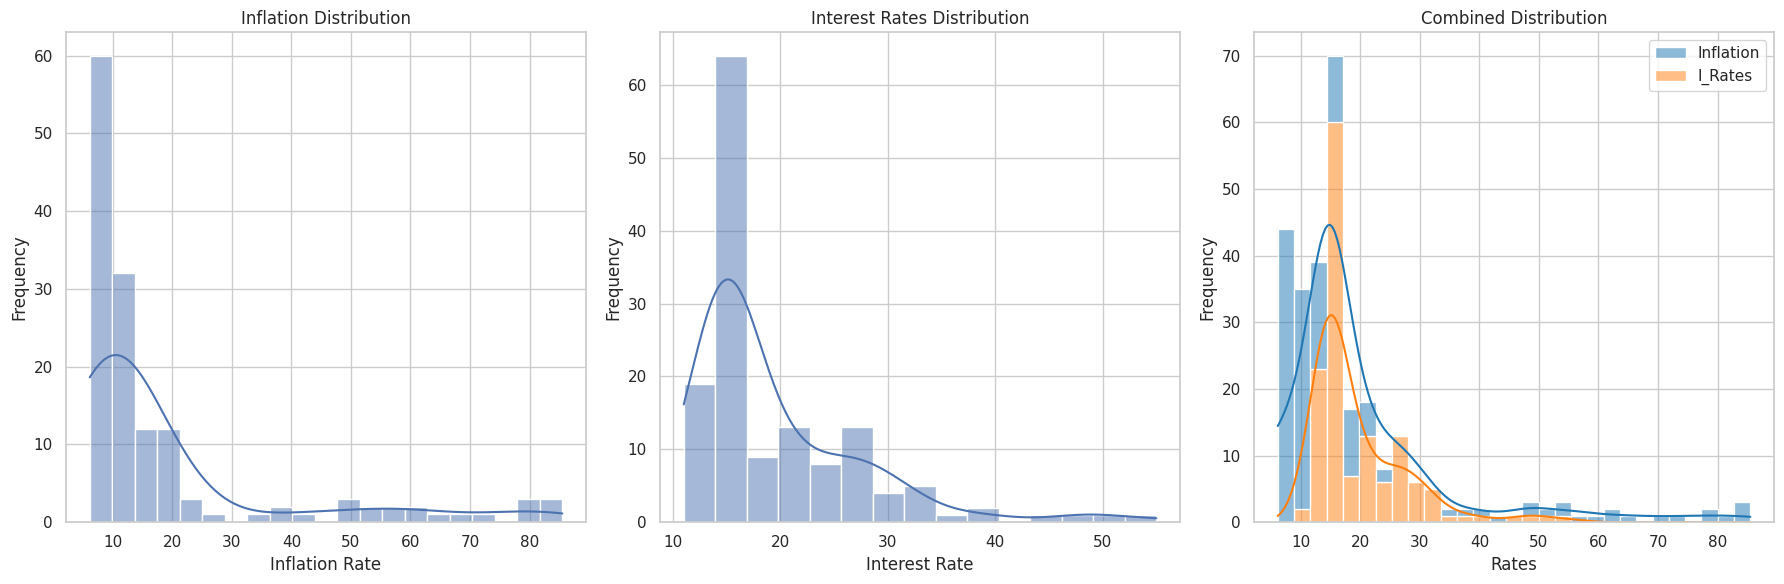

In [12]:
# Setting the aesthetics for the plots
sns.set(style="whitegrid")
# Creating the plots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
# Plot for Inflation
sns.histplot(data['Inflation'], kde=True, ax=axes[0])
axes[0].set_title('Inflation Distribution')
axes[0].set_xlabel('Inflation Rate')
axes[0].set_ylabel('Frequency')
# Plot for Interest Rates
sns.histplot(data['I_Rates'], kde=True, ax=axes[1])
axes[1].set_title('Interest Rates Distribution')
axes[1].set_xlabel('Interest Rate')
axes[1].set_ylabel('Frequency')
# Combined plot for the entire dataset
sns.histplot(data, multiple="stack", palette="tab10", kde=True, ax=axes[2])
axes[2].set_title('Combined Distribution')
axes[2].set_xlabel('Rates')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Here are the distribution plots for the ‘Inflation’ and ‘Interest Rates’ data, along with a combined
plot:

Inflation Distribution:

This plot shows the frequency distribution of the inflation rates. You can observe that the distri-
bution is skewed and does not resemble a typical bell curve associated with normal distributions.
Interest Rates Distribution:

Similar to the inflation data, the interest rates data also exhibits a skewed distribution. It does not follow the symmetrical shape of a normal distribution. Combined Distribution:

This plot stacks the distributions of both inflation and interest rates. It helps to visualize the
overall spread of the data points in the dataset. As seen, the combined data also does not exhibit
characteristics of a normal distribution. These visual representations corroborate the results of the
Shapiro-Wilk test, further indicating that the data for both ‘Inflation’ and ‘Interest Rates’ does
not follow a normal distribution

## 7 Creating QQ plots for Inflation and Interest Rates

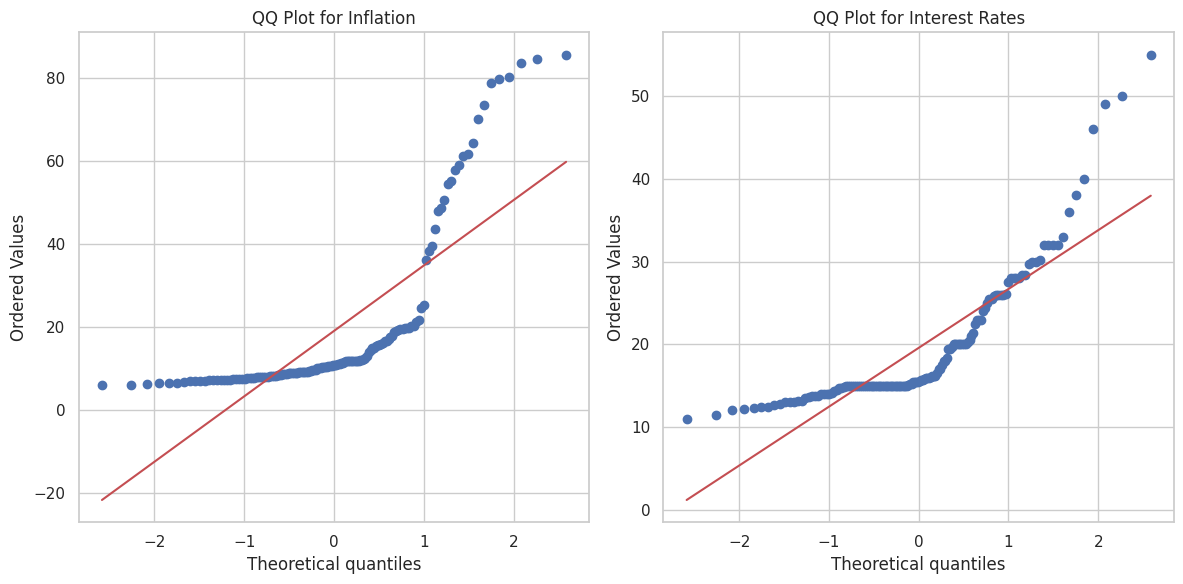

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
# QQ plot for Inflation
stats.probplot(data['Inflation'], dist="norm", plot=axes[0])
axes[0].set_title('QQ Plot for Inflation')
# QQ plot for Interest Rates
stats.probplot(data['I_Rates'], dist="norm", plot=axes[1])
axes[1].set_title('QQ Plot for Interest Rates')
plt.tight_layout()
plt.show()

The QQ (Quantile-Quantile) plots for both ‘Inflation’ and ‘Interest Rates’ are displayed above:

QQ Plot for Inflation:

This plot compares the quantiles of the inflation data against the quantiles of a normal distribution.
A perfect alignment along the straight line would indicate a normal distribution. However, the
plotted points significantly deviate from the line, especially at the tails, confirming that the inflation
data is not normally distributed. QQ Plot for Interest Rates:

Similarly, the QQ plot for interest rates shows a deviation from the straight line, particularly in
the tails of the distribution. This pattern is a clear indication that the interest rates data also does not follow a normal distribution. Both plots reinforce the earlier findings from the Shapiro-Wilk
test and the histogram analysis, affirming that the data for both ‘Inflation’ and ‘Interest Rates’
deviates from normality.

## 8 Testing For Equal Variance Between Inflation and Interest Rates Using Levene’s Test

In [14]:
from scipy.stats import levene
levene_test_result = levene(data['Inflation'], data['I_Rates'])
levene_test_result

LeveneResult(statistic=10.631383308422809, pvalue=0.0012483009131219994)

The Levene’s test for equal variances between ‘Inflation’ and ‘Interest Rates’ yields the following
result:
- Test Statistic: 10.63
- p-value: 0.00125

Interpretation:

The p-value is 0.00125, which is below the common alpha level of 0.05. This indicates that there is
a statistically significant difference in the variances of the two groups.

A significant result in Levene’s test suggests that the assumption of equal variances is violated.

Conclusion:

Given this result, it’s important to be cautious when performing statistical tests that assume equal
variances between these two groups, such as certain types of t-tests. Alternative approaches or
adjustments may be required to account for this variance inequality.

## 9 Conducting Welch’s t-test

In [15]:
from scipy.stats import ttest_ind
welchs_t_test_result = ttest_ind(data['Inflation'], data['I_Rates'],equal_var=False)
welchs_t_test_result

TtestResult(statistic=-0.2823319415196684, pvalue=0.7780011929169107, df=187.02477442404705)

The Welch’s t-test, which is appropriate for samples with unequal variances, yields the following
result for comparing ‘Inflation’ and ‘Interest Rates’:
- Test Statistic: -0.282
- p-value: 0.77

Interpretation:
The test statistic is -0.282, which is relatively small in magnitude, indicating a minor difference in
the means of the two groups.

The p-value is 0.778, which is much higher than the conventional alpha level of 0.05. This suggests
that there is no statistically significant difference in the means of the ‘Inflation’ and ‘Interest Rates’ groups.

Conclusion:

Based on Welch’s t-test, we cannot reject the null hypothesis that the two groups have equal means.
This means that, statistically, the average values of ‘Inflation’ and ‘Interest Rates’ in our dataset
are not significantly different from each other

## 10 Calculating the critical t-values for the rejection areas

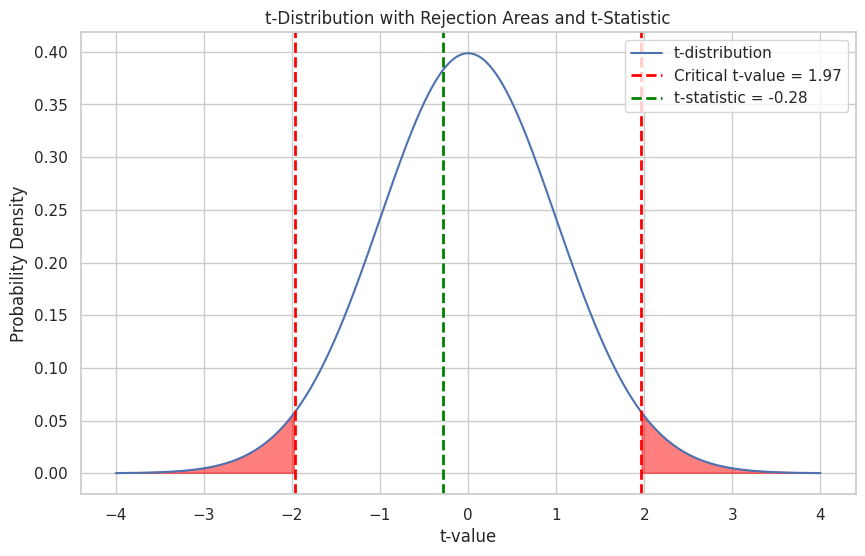

In [16]:
# Using a 95% confidence interval (alpha = 0.05) for a two-tailed test
alpha = 0.05
df = len(data['Inflation']) + len(data['I_Rates']) - 2
# degrees of freedom for two independent samples
critical_t = stats.t.ppf(1 - alpha/2, df)
# Range for the t-distribution plot
t_values = np.linspace(-4, 4, 1000)
t_dist = stats.t.pdf(t_values, df)
# Creating the plot
plt.figure(figsize=(10, 6))
plt.plot(t_values, t_dist, label="t-distribution")
plt.fill_between(t_values, t_dist, where=np.abs(t_values) >= critical_t, color='red', alpha=0.5)
plt.axvline(x=critical_t, color='red', linestyle='--', lw=2, label=f'Critical t-value = {critical_t:.2f}')
plt.axvline(x=-critical_t, color='red', linestyle='--', lw=2)
plt.axvline(x=welchs_t_test_result.statistic, color='green', linestyle='--',lw=2, label=f't-statistic = {welchs_t_test_result.statistic:.2f}')
plt.xlabel('t-value')
plt.ylabel('Probability Density')
plt.title('t-Distribution with Rejection Areas and t-Statistic')
plt.legend()
plt.show()

The plot above illustrates the t-distribution for the Welch’s t-test, along with the critical t-values
marking the rejection areas and the observed t-statistic:

t-Distribution Curve:

The curve represents the probability density of the t-distribution based on the degrees of freedom
from our data. Rejection Areas (in red):

The shaded areas on either end of the curve represent the rejection regions for a two-tailed test with a 95% confidence interval (alpha = 0.05). Any t-value falling in these regions would lead to
the rejection of the null hypothesis. Critical t-Values:

The dashed red lines indicate the critical t-values (±critical_t) beyond which the null hypothesis
would be rejected. Observed t-Statistic (in green):

The green dashed line shows the observed t-statistic from Welch’s t-test (t-statistic). It falls well within the acceptance region (not in the red shaded areas), indicating that the null hypothesis (that the means of the two groups are equal) cannot be rejected. This visual representation clearly shows that the result of Welch’s t-test does not lead to the rejection of the null hypothesis for the equality of means between ‘Inflation’ and ‘Interest Rates’.

## 11 Monte Carlo Simulation

In [17]:
 # Number of simulations
n_simulations = 10000
# Original t-statistic
original_t_statistic = welchs_t_test_result.statistic
# Simulating the t-test and recording the t-statistics
simulated_t_statistics = []
for _ in range(n_simulations):
    # Generating random samples for Inflation and Interest Rates
    simulated_inflation = np.random.normal(data['Inflation'].mean(), data['Inflation'].std(), len(data['Inflation']))
    simulated_interest_rates = np.random.normal(data['I_Rates'].mean(), data['I_Rates'].std(), len(data['I_Rates']))
    # Conducting Welch's t-test on the simulated data
    t_statistic = ttest_ind(simulated_inflation, simulated_interest_rates,equal_var=False).statistic
    simulated_t_statistics.append(t_statistic)
# Calculating the p-value
p_value = np.sum(np.abs(simulated_t_statistics) >= np.abs(original_t_statistic)) / n_simulations
p_value

0.7848

Interpretation: This p-value is consistent with the one obtained from the direct application of
Welch’s t-test to your original data (p-value: 0.778). A p-value of 0.7858 indicates that there’s a
78.58% probability of observing a t-statistic as extreme as the one from the original data, under
the null hypothesis that the means of ‘Inflation’ and ‘Interest Rates’ are equal. Conclusion: This
high p-value further supports the conclusion that there is no statistically significant difference in
the means of the ‘Inflation’ and ‘Interest Rates’ groups in your dataset

# 12 Plotting the distribution of the simulated t-statistics

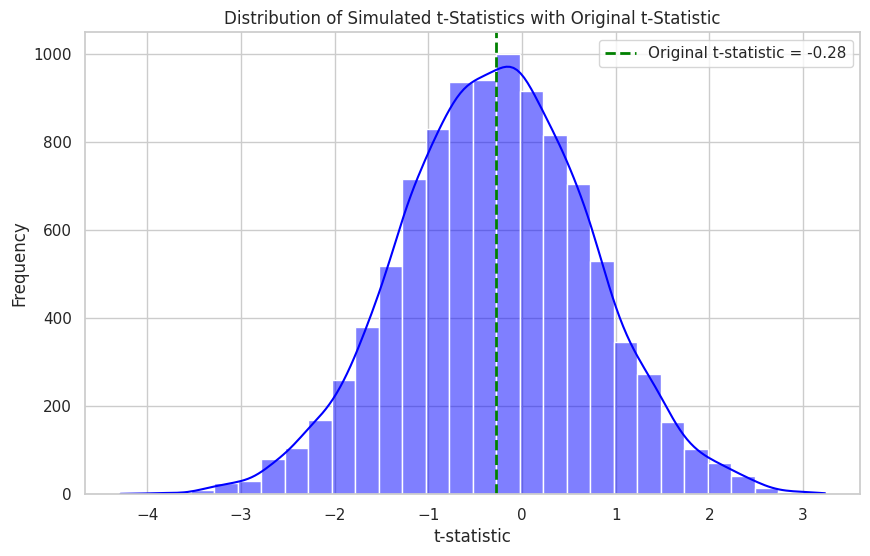

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(simulated_t_statistics, kde=True, bins=30, color='blue')
plt.axvline(x=original_t_statistic, color='green', linestyle='--', lw=2,label=f'Original t-statistic = {original_t_statistic:.2f}')
plt.xlabel('t-statistic')
plt.ylabel('Frequency')
plt.title('Distribution of Simulated t-Statistics with Original t-Statistic')
plt.legend()
plt.show()

The plot above displays the distribution of t-statistics obtained from the Monte Carlo simulation,
along with the original t-statistic from your data:

Distribution of Simulated t-Statistics:

The histogram (in blue) shows the frequency distribution of the t-statistics from the 10,000 simu-
lated datasets. This distribution represents the range of t-statistic values you might expect under
the null hypothesis. Original t-Statistic:

The green dashed line marks the original t-statistic obtained from Welch’s t-test on your actual data. It lies well within the common range of the simulated t-statistics, indicating that it’s not an outlier in terms of statistical significance. This visual representation supports the p-value obtained from the Monte Carlo simulation, demonstrating that the original t-tatistic does not stand out as extreme or unusual compared to what we might expect if the null hypothesis were true.

## 13 Does interest rates effect on inflation?

Determining whether interest rates have an effect on inflation involves examining the relationship
between these two variables. This can be approached in several ways:

Correlation Analysis:

A correlation analysis (like Pearson or Spearman correlation) can quantify the strength and direc-
tion of the relationship between interest rates and inflation. However, correlation does not imply
causation; it only indicates how closely the two variables move together. Regression Analysis:

A regression analysis, particularly a linear regression, can help understand if changes in interest rates can predict changes in inflation. This method can provide insights into the strength and direction of the relationship, with the caution that it still doesn’t prove causation. Time Series
Analysis:

Since both inflation and interest rates are time series data, methods like Granger causality tests
or Vector Autoregression (VAR) can be used to explore the directional influence between the two.
These methods are more sophisticated and can account for the temporal nature of the data. Eco-
nomic Theory:

According to economic theory, particularly the Keynesian perspective, interest rates can influence
inflation. Higher interest rates can reduce spending and borrowing, potentially leading to lower
inflation, and vice versa. However, this relationship can be complex and influenced by many other factors. External Factors:

It’s important to note that many other factors can influence both inflation and interest rates, such
as economic policies, global economic conditions, supply chain issues, etc. Therefore, any analysis
should be contextualized within the broader economic environment. Given the data you have, we
can start with a simple correlation analysis to see the strength and direction of the relationship
between interest rates and inflation. Let’s perform this analysis:

The correlation coefficient between ‘Inflation’ and ‘Interest Rates’ is approximately 0.677.

Interpretation: This positive correlation coefficient indicates a moderately strong relationship be-
tween inflation and interest rates. As one increases, the other tends to increase as well. However,
it’s crucial to remember that correlation does not imply causation. This means that while the
two variables move together to a certain extent, we cannot conclude that changes in interest rates
cause changes in inflation based on this statistic alone. Further Analysis: To explore causation
or more specific relationships, a more detailed analysis, such as regression or time series analysis, would be needed. These analyses can help understand if changes in interest rates predict changes in inflation, considering the temporal aspect of the data. Additionally, it’s important to consider other economic factors and the broader context when interpreting these results, as the relationship between interest rates and inflation can be influenced by various external factors.

## 14 Performing a correlation analysis between Inflation and Interest Rates

In [19]:
correlation = data[['Inflation', 'I_Rates']].corr().iloc[0, 1]
correlation

0.6774654155052491

## 15 Non-Linear Regression With OLS (Polynomial)

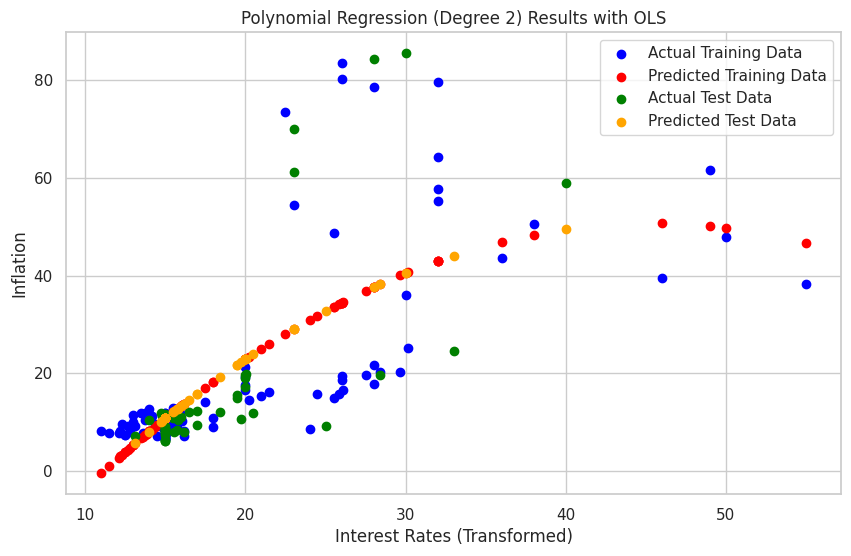

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.536
Model:                            OLS   Adj. R-squared:                  0.526
Method:                 Least Squares   F-statistic:                     55.48
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           9.68e-17
Time:                        12:08:01   Log-Likelihood:                -395.43
No. Observations:                  99   AIC:                             796.9
Df Residuals:                      96   BIC:                             804.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -38.4804      8.313     -4.629      0.000     -54.982     -21.979
x1             3.9336      0.682      5.770      0.000       2.580       5.287
x2            -0.0434      0.012     -3.662      0.000      -0.067      -0.020
==============================================================================
Omnibus:                       45.767   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.514
Skew:                           1.697   Prob(JB):                     6.77e-27
Kurtosis:                       7.206   Cond. No.                     4.33e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures

X = data[['I_Rates']]
y = data[['Inflation']]
# Generating polynomial features (degree 2) from the original data
poly_features_degree_2 = PolynomialFeatures(degree=2)
X_poly_2 = poly_features_degree_2.fit_transform(X)
# Splitting the data into training and test sets
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_poly_2, y,
                                                            test_size=0.3,
                                                            random_state=42
                                                            )
# Adding a constant to the model for the intercept
X_train_sm_2 = sm.add_constant(X_train_2)
# Fitting the model using statsmodels
model_sm_2 = sm.OLS(y_train_2, X_train_sm_2).fit()
# Making predictions using the model
y_train_pred_sm_2 = model_sm_2.predict(X_train_sm_2)
X_test_sm_2 = sm.add_constant(X_test_2)
# Adding a constant to the test set
y_test_pred_sm_2 = model_sm_2.predict(X_test_sm_2)
# Plotting the results for degree 2 polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(X_train_2[:, 1], y_train_2, color='blue', label='Actual Training Data')
plt.scatter(X_train_2[:, 1], y_train_pred_sm_2, color='red', label='Predicted Training Data')
plt.scatter(X_test_2[:, 1], y_test_2, color='green', label='Actual Test Data')
plt.scatter(X_test_2[:, 1], y_test_pred_sm_2, color='orange', label='Predicted Test Data')
plt.title('Polynomial Regression (Degree 2) Results with OLS')
plt.xlabel('Interest Rates (Transformed)')
plt.ylabel('Inflation')

plt.legend()
plt.show()
# Printing the summary of the model
model_sm_2.summary()


The summary of the Polynomial Regression (Degree 2) model using OLS (Ordinary Least Squares)
provides several key statistics and information about the model’s fit and significance. Here’s an
interpretation of the main components:

Dependent Variable (Inflation): The model is predicting the ‘Inflation’ variable.

R-squared (0.536): This statistic indicates that approximately 53.6% of the variance in the inflation
data is explained by the model. It’s a measure of the goodness of fit.

Adjusted R-squared (0.526): Similar to R-squared, but adjusted for the number of predictors in
the model. It is more appropriate for comparing models with a different number of predictors.

F-statistic (55.48): This tests the overall significance of the model.
The high F-statistic value
suggests that at least some of the predictor variables are significantly related to the dependent
variable.

Prob (F-statistic) (<0.0001 or 9.68e-17): This is the probability of observing such a large F-statistic
if the null hypothesis is true (i.e., the model with no predictors fits the data as well as your model).
A very low value here (practically zero) indicates that the model is statistically significant.

Coefficients:

const (-38.4804): This is the y-intercept of the regression line. It represents the predicted value of ‘Inflation’ when all predictor variables are zero. x1 (3.9336): The coefficient for the first polynomial term. It indicates the change in ‘Inflation’ for a one-unit change in the transformed ‘Interest Rates’
variable. x2 (-0.0434): The coefficient for the second polynomial term. Standard Error, t-values,
and P>|t|: These columns give the standard error of each coefficient, the t-statistic (a measure
of how many standard deviations the coefficient is away from 0), and the p-value (which tests the
hypothesis that each coefficient is different from zero). The low p-values for the coefficients suggest
they are statistically significant.

Confidence Interval ([0.025, 0.975]): This provides the range within which we can be 95% confident
that the true value of the coefficient lies.

Durbin-Watson (1.935): This statistic tests for autocorrelation in the residuals. A value close to 2
suggests there is no autocorrelation. In this case, it indicates that the residuals are independent.

Omnibus, Prob(Omnibus), Skew, Kurtosis, Jarque-Bera (JB), Prob(JB), and Cond. No.: These
are additional tests for the normality of residuals, the presence of skewness and kurtosis, and other
diagnostic tests. For instance, a high JB value with a low Prob(JB) suggests that the residuals are
not normally distributed.

In summary, this model appears to be statistically significant with a reasonable fit to the data,
although there may be some issues with the normality of residuals, as indicated by the Omnibus
and Jarque-Bera tests. The model explains over half of the variance in the data, which is a decent
level of explanatory power for many applications.

## 16 Plotting Polynomial Regression degree=3

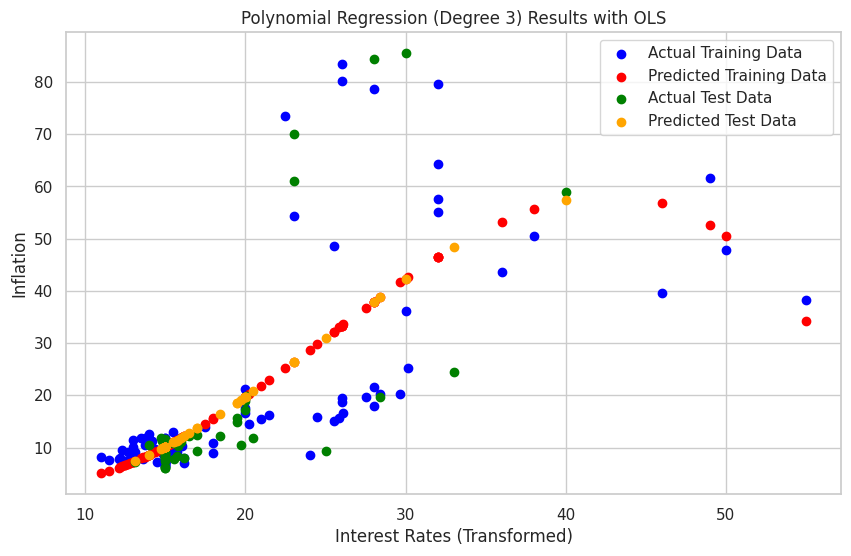

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Inflation   R-squared:                       0.553
Model:                            OLS   Adj. R-squared:                  0.539
Method:                 Least Squares   F-statistic:                     39.25
Date:                Sat, 18 Nov 2023   Prob (F-statistic):           1.37e-16
Time:                        12:08:01   Log-Likelihood:                -393.55
No. Observations:                  99   AIC:                             795.1
Df Residuals:                      95   BIC:                             805.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.7461     26.942      0.399      0.691     -42.741      64.234
x1            -2.2284      3.282     -0.679      0.499      -8.744       4.288
x2             0.1827      0.118      1.543      0.126      -0.052       0.418
x3            -0.0024      0.001     -1.918      0.058      -0.005    8.56e-05
==============================================================================
Omnibus:                       53.371   Durbin-Watson:                   1.904
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              175.306
Skew:                           1.893   Prob(JB):                     8.56e-39
Kurtosis:                       8.307   Cond. No.                     6.01e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.01e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
# Generating polynomial features (degree 3) from the original data
poly_features_degree_3 = PolynomialFeatures(degree=3)
X_poly_3 = poly_features_degree_3.fit_transform(X)
# Splitting the data into training and test sets
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_poly_3, y,
                                                            test_size=0.3,
                                                            random_state=42
                                                            )
# Adding a constant to the model for the intercept
X_train_sm_3 = sm.add_constant(X_train_3)
# Fitting the model using statsmodels
model_sm_3 = sm.OLS(y_train_3, X_train_sm_3).fit()
# Making predictions using the model
y_train_pred_sm_3 = model_sm_3.predict(X_train_sm_3)
X_test_sm_3 = sm.add_constant(X_test_3)
# Adding a constant to the test set
y_test_pred_sm_3 = model_sm_3.predict(X_test_sm_3)
# Plotting the results for degree 3 polynomial regression
plt.figure(figsize=(10, 6))
plt.scatter(X_train_3[:, 1], y_train_3, color='blue', label='Actual Training Data')
plt.scatter(X_train_3[:, 1], y_train_pred_sm_3, color='red', label='Predicted Training Data')
plt.scatter(X_test_3[:, 1], y_test_3, color='green', label='Actual Test Data')
plt.scatter(X_test_3[:, 1], y_test_pred_sm_3, color='orange', label='Predicted Test Data')
plt.title('Polynomial Regression (Degree 3) Results with OLS')
plt.xlabel('Interest Rates (Transformed)')
plt.ylabel('Inflation')

plt.legend()
plt.show()
# Printing the summary of the model
model_sm_3.summary()

Dependent Variable (Inflation): The variable being predicted or explained in the model is inflation.

R-squared (0.553): This indicates that approximately 55.3% of the variation in the dependent variable (inflation) can be explained by the independent variables in the model. It’s a measure of the model’s fit.

Adjusted R-squared (0.539): This is a modified version of R-squared that has been adjusted for
the number of predictors in the model. It’s usually lower than R-squared and is considered a more
accurate measure for the goodness of fit, especially when comparing models with different numbers of predictors.

F-statistic (39.25) and Prob (F-statistic) (1.37e-16): These values test the overall significance of the regression model. The F-statistic is quite high and the probability value is very low, indicating that the model is statistically significant.

Log-Likelihood, AIC, and BIC: These are measures used for model comparison.
Lower values generally indicate a better model.

Coefficients (coef): These values represent the change in the dependent variable for a one-unit
change in the respective independent variable, holding other variables constant.

const (10.7461): This is the intercept term. It indicates the expected mean value of the dependent
variable when all independent variables are zero. x1, x2, x3: These are the coefficients for the
independent variables. Their values indicate the impact of each variable on the dependent variable.
Standard Error (std err): These values measure the average distance that the observed values fall
from the regression line.

t and P>|t|: These are the t-statistics and p-values for the hypothesis test for each coefficient. A low p-value (<0.05) typically indicates that the coefficient is significantly different from zero.

Confidence Interval ([0.025 0.975]): This provides the range within which the true population
parameter is likely to fall with a 95% confidence level.

Diagnostic Tests:

Omnibus and Prob(Omnibus): Tests the skewness and kurtosis of the residuals. A low p-value
here (close to 0) suggests non-normality in the residuals. Durbin-Watson: Tests for autocorrelation
in the residuals. Values close to 2 suggest no autocorrelation. Jarque-Bera (JB) and Prob(JB):
Tests for normality of residuals. Again, a low p-value indicates non-normality. Skew and Kurtosis:
Measures for the asymmetry and tailedness of the distribution of residuals. Condition Number:
Indicates potential multicollinearity issues.
High values (over 30) might signal problems.
This output provides a comprehensive view of the model’s performance, indicating how well the model
fits the data and the significance of the individual predictors. However, interpretation should also consider the context of the data and the research question at hand.